In [1]:
import matplotlib.pyplot as Plt
import numpy as np
import os 
import sys
from PIL import Image
import random
import cv2
import functools
from copy import deepcopy
from sklearn.linear_model import LogisticRegression
import import_ipynb
import Assignment6_Question1

importing Jupyter notebook from Assignment6_Question1.ipynb
importing Jupyter notebook from Image_Extract.ipynb
50.0
55.55555555555556


61.111111111111114
61.111111111111114


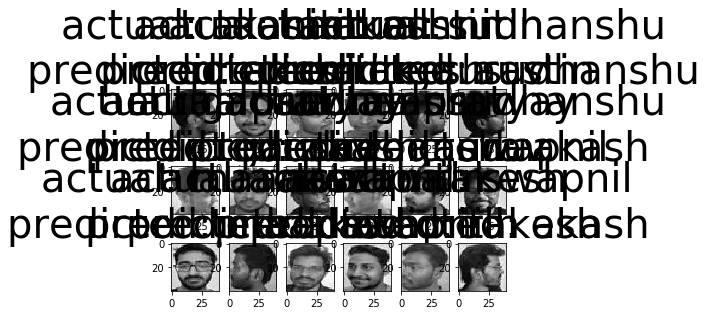

In [2]:
%run Assignment6_Question1.ipynb
X_train = Eigen_faces
X_test = Data_projected

In [3]:
Mean_vectors = []
for i in range(1, len(Y_values) + 1) :
    Mean_vectors.append(np.mean(X_train[Y_train == i], axis = 0))
Mean_vectors = np.array(Mean_vectors)

In [4]:
s_w = np.zeros((K, K))
for i in range(1, Mean_vectors.shape[0] + 1) :
    sc_mat = np.zeros((K, K))
    for Row in X_train[Y_train == i] :
        Row1, Mean1 = Row.reshape(K, 1), Mean_vectors[i - 1].reshape(K, 1)
        sc_mat += np.dot((Row1 - Mean1), np.transpose(Row1 - Mean1))
    s_w += sc_mat

In [5]:
Overall_mean = np.mean(X_train, axis = 0)
s_b = np.zeros((K, K))
for i in range(1, Mean_vectors.shape[0] + 1) :
    N = X_train[Y_train == i].shape[0]
    Mean1 = Mean_vectors[i - 1].reshape(K, 1)
    Overall_Mean1 = Overall_mean.reshape(K, 1)
    s_b += N * np.dot((Mean1 - Overall_Mean1), np.transpose(Mean1 - Overall_Mean1))

In [6]:
Cov_matrix = np.dot(np.linalg.inv(s_w), s_b)

In [7]:
U, S, V = np.linalg.svd(Cov_matrix)

In [8]:
K_new = 30
w = []
for i in range(K_new) :
    w.append(U[:, i])
w = np.array(w)

In [9]:
Transformed_X_train = np.dot(X_train, np.transpose(w))

In [10]:
Transformed_X_test = np.dot(X_test, np.transpose(w))

In [11]:
LogisticRegr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
LogisticRegr.fit(X_train, Y_train)
Predictions = LogisticRegr.predict(X_test)
Score = LogisticRegr.score(X_test, Y_test)
print(float(100)*Score)

61.111111111111114


In [12]:
LogisticRegr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
LogisticRegr.fit(Transformed_X_train, Y_train)
Predictions = LogisticRegr.predict(Transformed_X_test)
Score = LogisticRegr.score(Transformed_X_test, Y_test)
print(float(100)*Score)

61.111111111111114


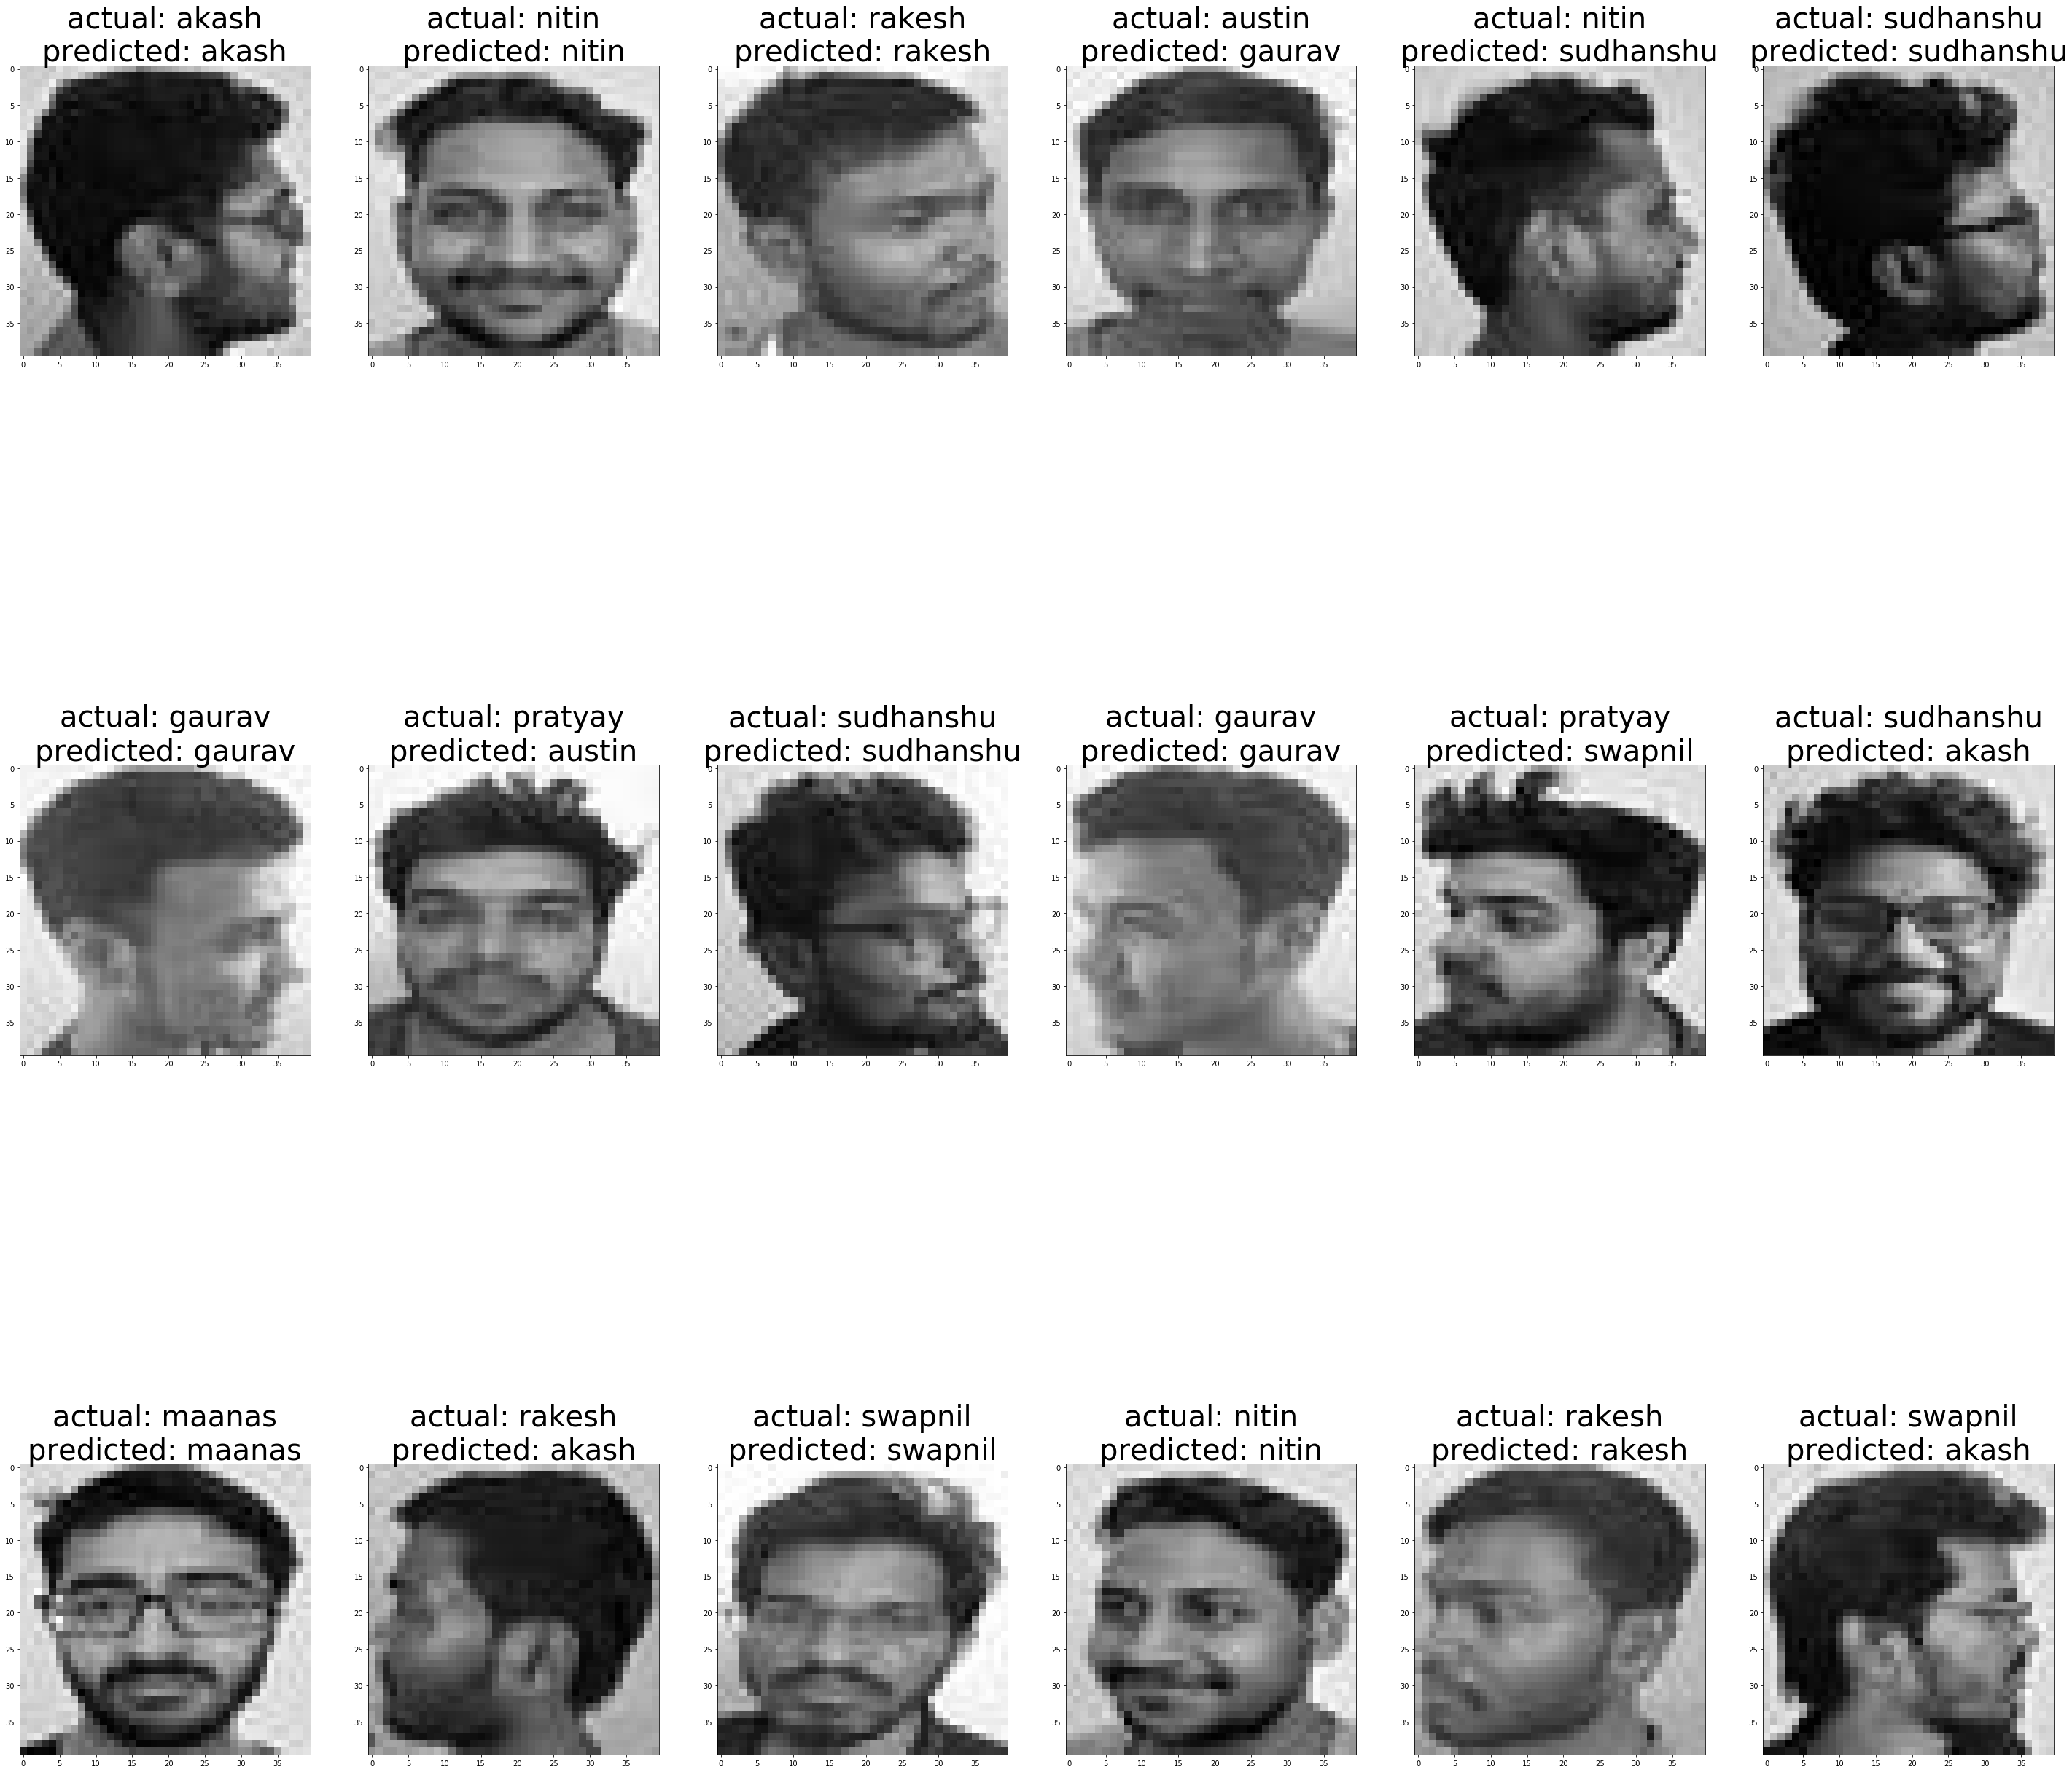

In [13]:
k = 1
Fig = Plt.figure()
Plt.rcParams['figure.figsize'] = [50, 50]
for i in range(6) :
    for j in range(3) :
        Tmp = deepcopy(X_test_original[6 * j + i])
        Tmp = Tmp.reshape(new_image_height, new_image_width)
        Plt.subplot(3, 6, k)
        label_predicted = Y_inverse_values[Predictions[6 * j + i]]
        label_actual = Y_inverse_values[Y_test[6 * j + i]]
        title = "actual: " + label_actual + "\npredicted: " + label_predicted 
        Plt.title(title, fontsize=40)
        k = k + 1
        Plt.imshow(cv2.cvtColor(Tmp, cv2.COLOR_GRAY2RGB))